In [1]:
!pwd

/home/zhimin90/DePaul/DSC468/Project/Model


In [2]:
CSV_PATH = "/home/zhimin90/DePaul/DSC468/Project/Asset/CSV/"

In [3]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2",order="date DESC", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.iloc[0:99,-20:-1]

date                                block  iucr  \
0   2020-04-10T23:57:00.000                 035XX W DOUGLAS BLVD  0497   
1   2020-04-10T23:40:00.000                     078XX S STATE ST  041A   
2   2020-04-10T23:40:00.000                   079XX S RACINE AVE  0454   
3   2020-04-10T23:35:00.000                  067XX S SANGAMON ST  2826   
4   2020-04-10T23:31:00.000               0000X W IDA B WELLS DR  0325   
..                      ...                                  ...   ...   
94  2020-04-10T19:00:00.000  072XX S DR MARTIN LUTHER KING JR DR  1310   
95  2020-04-10T19:00:00.000                  058XX N KENMORE AVE  1310   
96  2020-04-10T19:00:00.000                 033XX S MICHIGAN AVE  0281   
97  2020-04-10T19:00:00.000                043XX S FAIRFIELD AVE  0910   
98  2020-04-10T18:58:00.000                 061XX N HAMILTON AVE  0486   

               primary_type  \
0                   BATTERY   
1                   BATTERY   
2                   BATTERY   
3             OTHER OFFENSE   
4                   ROBBERY   
..                      ...   
94          CRIMINAL DAMAGE   
95          CRIMINAL DAMAGE   
96  CRIMINAL SEXUAL ASSAULT   
97      MOTOR VEHICLE THEFT   
98                  BATTERY   

                                          description  \
0   AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...   
1                                AGGRAVATED - HANDGUN   
2   AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
3                      HARASSMENT BY ELECTRONIC MEANS   
4                                 VEHICULAR HIJACKING   
..                                                ...   
94                                        TO PROPERTY   
95                                        TO PROPERTY   
96                                     NON-AGGRAVATED   
97                                         AUTOMOBILE   
98                            DOMESTIC BATTERY SIMPLE   

         location_description  arrest  domestic  beat district ward  \
0                   APARTMENT   False      True  1021      010   24   
1                 GAS STATION   False     False  0623      006    6   
2                    SIDEWALK    True     False  0612      006   17   
3                   RESIDENCE   False      True  0723      007    6   
4                      STREET   False     False  0111      001    4   
..                        ...     ...       ...   ...      ...  ...   
94                  RESIDENCE   False     False  0323      003    6   
95                  RESIDENCE   False     False  2022      020   48   
96  NURSING / RETIREMENT HOME   False     False  0211      002    3   
97                     STREET   False     False  0922      009   15   
98                  APARTMENT   False      True  2413      024   40   

   community_area fbi_code x_coordinate y_coordinate  year  \
0              29      04B      1153039      1893064  2020   
1              69      04B      1177650      1852817  2020   
2              71      08B      1169704      1851993  2020   
3              68       26      1171140      1860077  2020   
4              32       03          NaN          NaN  2020   
..            ...      ...          ...          ...   ...   
94             69       14      1180162      1857100  2020   
95             77       14      1168185      1939075  2020   
96             35       02      1177742      1882956  2020   
97             58       07      1158755      1875780  2020   
98              2      08B      1160887      1940563  2020   

                 updated_on      latitude      longitude  
0   2020-04-17T15:52:24.000  41.862417243  -87.713692354  
1   2020-04-17T15:52:24.000  41.751452878  -87.624567581  
2   2020-04-17T15:52:24.000  41.749367645  -87.653709647  
3   2020-04-17T15:52:24.000  41.771519919  -87.648211644  
4   2020-04-17T15:52:24.000           NaN            NaN  
..                      ...           ...            ...  
94  2020-04-17T15:52:24.000  41.763148742   -87.61523137  
95  20

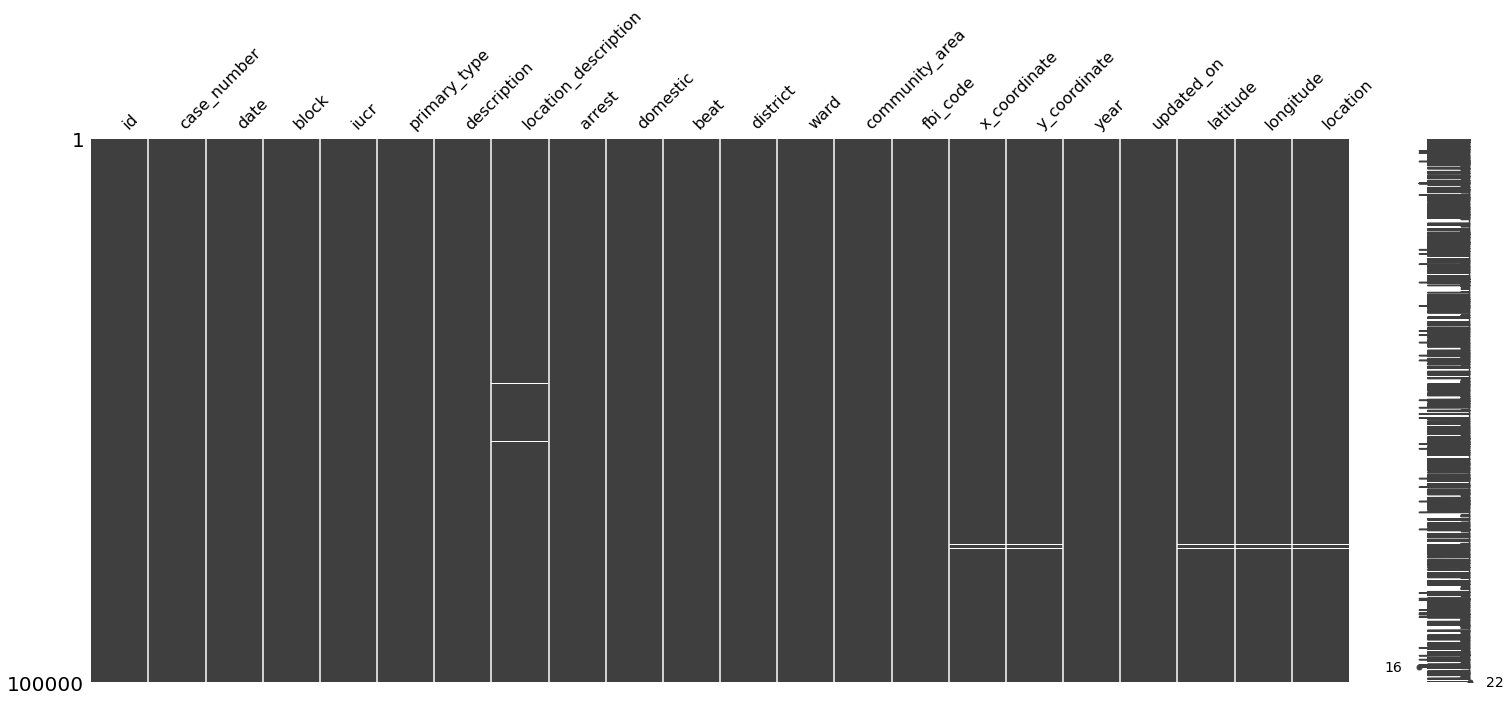

In [6]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(results_df)
plt.show()

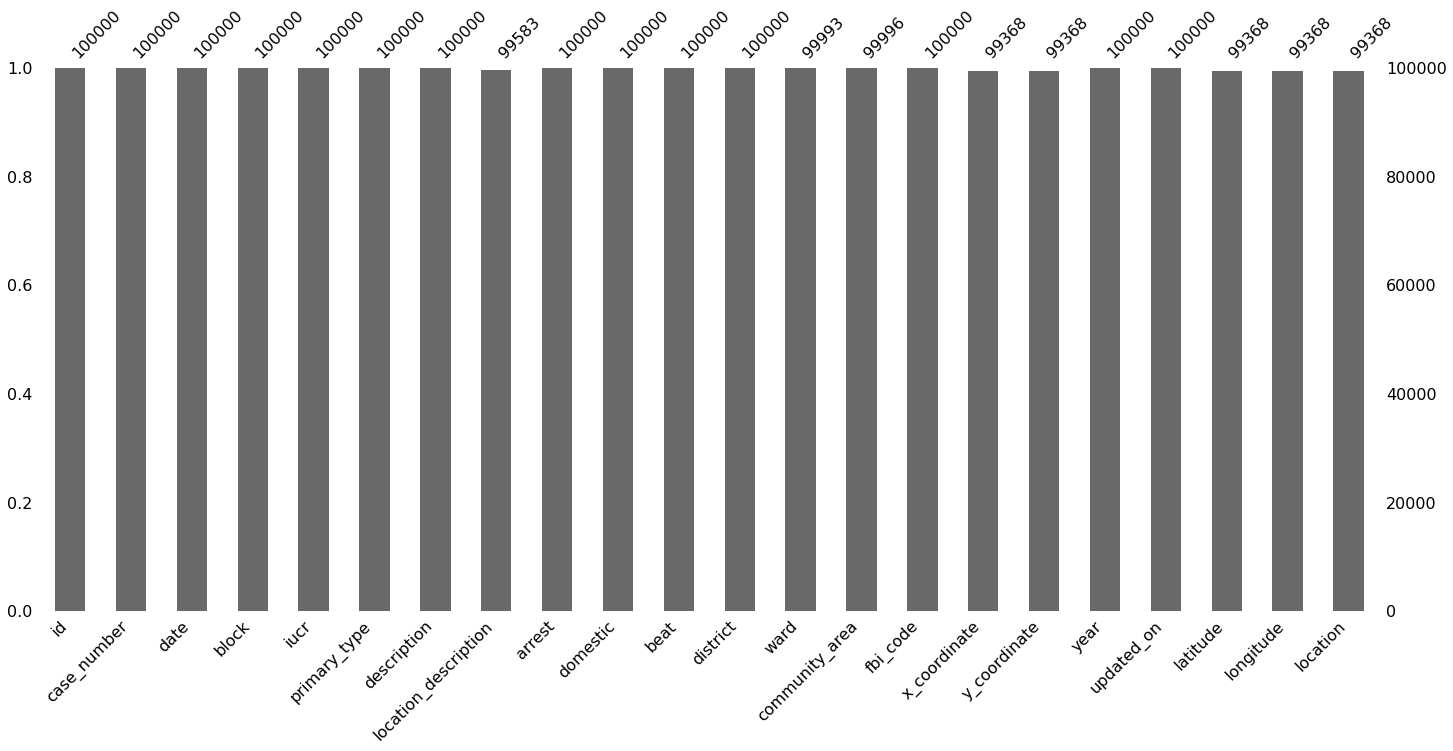

In [7]:
msno.bar(results_df) 

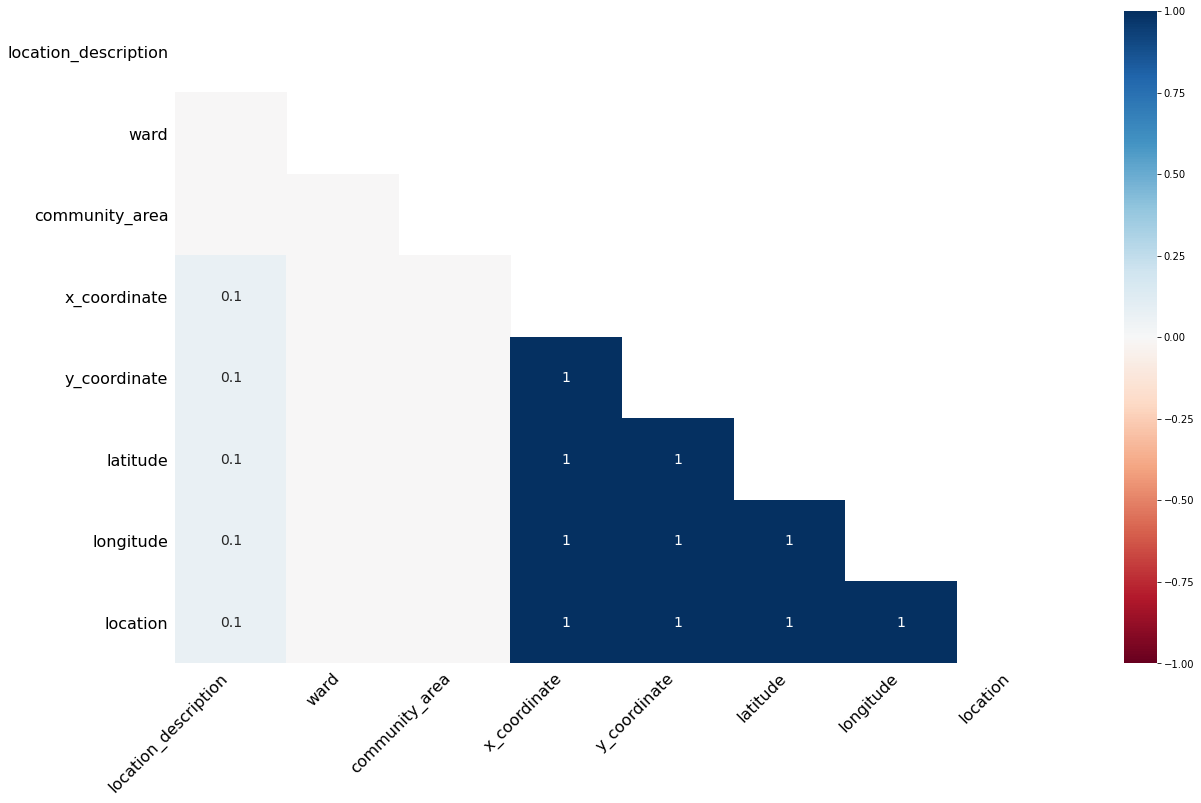

In [8]:
msno.heatmap(results_df) 

In [9]:
results_df.primary_type.value_counts()

THEFT                                23786
BATTERY                              19390
CRIMINAL DAMAGE                      10172
ASSAULT                               7958
DECEPTIVE PRACTICE                    6844
OTHER OFFENSE                         6448
NARCOTICS                             5077
BURGLARY                              3774
MOTOR VEHICLE THEFT                   3706
ROBBERY                               3507
CRIMINAL TRESPASS                     2695
WEAPONS VIOLATION                     2594
OFFENSE INVOLVING CHILDREN             975
INTERFERENCE WITH PUBLIC OFFICER       553
PUBLIC PEACE VIOLATION                 488
SEX OFFENSE                            487
CRIM SEXUAL ASSAULT                    341
CRIMINAL SEXUAL ASSAULT                256
PROSTITUTION                           200
HOMICIDE                               198
ARSON                                  158
STALKING                                79
LIQUOR LAW VIOLATION                    74
KIDNAPPING 

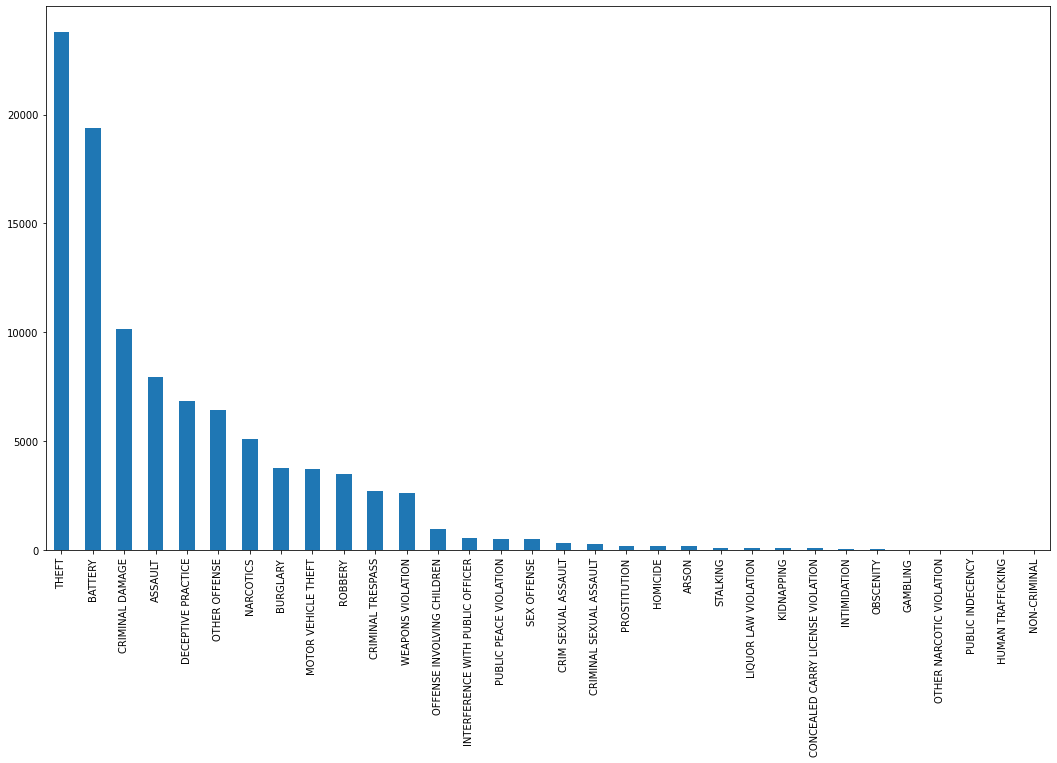

In [10]:
results_df.primary_type.value_counts().plot.bar(figsize=(18,10))

In [11]:
print(max(results_df.date))
print(min(results_df.date))

2020-04-10T23:57:00.000
2019-10-28T00:00:00.000


In [12]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [21]:
test_df = results_df
test_df = test_df[test_df.latitude.notna()].sort_values(['date'], ascending=[0])
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['updated_on'] = pd.to_datetime(test_df['updated_on'])
test_df['latitude'] = pd.to_numeric(test_df['latitude'])
test_df['longitude'] = pd.to_numeric(test_df['longitude'])

df = test_df
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [22]:
print(max(test_df['latitude']))
print(min(test_df['latitude']))
print(max(test_df['longitude']))
print(min(test_df['longitude']))

42.022547568
36.619446395
-87.524618154
-91.686565684


In [23]:
print(max(test_df['date']))
print(min(test_df['date']))

2020-04-10 23:57:00
2019-10-28 00:00:00


In [24]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['date'])
date_end = max(df['date'])

geo_price_map = df[['date', 'primary_type','latitude', 'longitude']]

In [25]:
filter1a = pd.to_numeric(geo_price_map['longitude']) > xbound[0]
filter1b = pd.to_numeric(geo_price_map['longitude']) < xbound[1]
filter1c = pd.to_numeric(geo_price_map['latitude']) > ybound[0]
filter1d = pd.to_numeric(geo_price_map['latitude']) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 99364


In [27]:
print(max(geo_price_map['latitude']))
print(min(geo_price_map['latitude']))
print(max(geo_price_map['longitude']))
print(min(geo_price_map['longitude']))

42.022547568
41.645050759
-87.524618154
-87.934567226


In [28]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    geo_price_map_filtered = geo_price_map[geo_price_map['longitude'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['date'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['date'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("crime count: " + str(geo_price_map_filtered.notnull().sum()))
    
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-03-11 23:57:00
2020-04-10 23:57:00
crime count: date            13399
primary_type    13399
latitude        13399
longitude       13399
dtype: int64
____________________
2020-03-04 23:57:00
2020-04-03 23:57:00
crime count: date            14751
primary_type    14751
latitude        14751
longitude       14751
dtype: int64
____________________
2020-02-26 23:57:00
2020-03-27 23:57:00
crime count: date            16023
primary_type    16023
latitude        16023
longitude       16023
dtype: int64
____________________
2020-02-19 23:57:00
2020-03-20 23:57:00
crime count: date            17438
primary_type    17438
latitude        17438
longitude       17438
dtype: int64
____________________
2020-02-12 23:57:00
2020-03-13 23:57:00
crime count: date            17917
primary_type    17917
latitude        17917
longitude       17917
dtype: int64
____________________
2020-02-05 23:57:00
2020-03-06 23:57:00
crime count: date            18023
primary_type    18023
latitude        18023
longit

In [29]:
map_arr.reverse()

In [ ]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [47]:
for geo_price_map in map_arr:
    geo_price_map = geo_price_map[geo_price_map['date'].notnull()]
    print(max(geo_price_map['latitude']))
    print(min(geo_price_map['latitude']))
    print(max(geo_price_map['longitude']))
    print(min(geo_price_map['longitude']))
    print(max(geo_price_map['latitude']) < ybound[1])
    print(min(geo_price_map['latitude']) > ybound[0])
    print(max(geo_price_map['longitude']) < xbound[1])
    print(min(geo_price_map['longitude']) > xbound[0])
    print("-"*20)
    

42.022547189
41.645795846999995
-87.52527447799999
-87.93114653399999
True
True
True
True
--------------------
42.022547568
41.645795846999995
-87.52527447799999
-87.93114653399999
True
True
True
True
--------------------
42.022547568
41.647922042
-87.52527447799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.647038441999996
-87.52703753799999
-87.917644638
True
True
True
True
--------------------
42.022547568
41.645903849
-87.52703753799999
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645903849
-87.525806046
-87.934567226
True
True
True
True
--------------------
42.022547568
41.645795846999995
-87.525663419
-87.934567226
True
True


In [48]:
#print last slide of the time aggregated list of dataframe
map_arr[-1][map_arr[-1]['date'].notnull()]

date         primary_type   latitude  longitude
0     2020-04-10 23:57:00              BATTERY  41.862417 -87.713692
2     2020-04-10 23:40:00              BATTERY  41.749368 -87.653710
1     2020-04-10 23:40:00              BATTERY  41.751453 -87.624568
3     2020-04-10 23:35:00        OTHER OFFENSE  41.771520 -87.648212
5     2020-04-10 23:31:00              BATTERY  41.789911 -87.701692
...                   ...                  ...        ...        ...
13529 2020-03-12 00:00:00        OTHER OFFENSE  41.809041 -87.601690
13526 2020-03-12 00:00:00                THEFT  41.863376 -87.656457
13527 2020-03-12 00:00:00  MOTOR VEHICLE THEFT  41.756197 -87.565106
13525 2020-03-12 00:00:00        OTHER OFFENSE  41.751445 -87.671953
13530 2020-03-11 23:58:00            NARCOTICS  41.757482 -87.607810

[13399 rows x 4 columns]

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


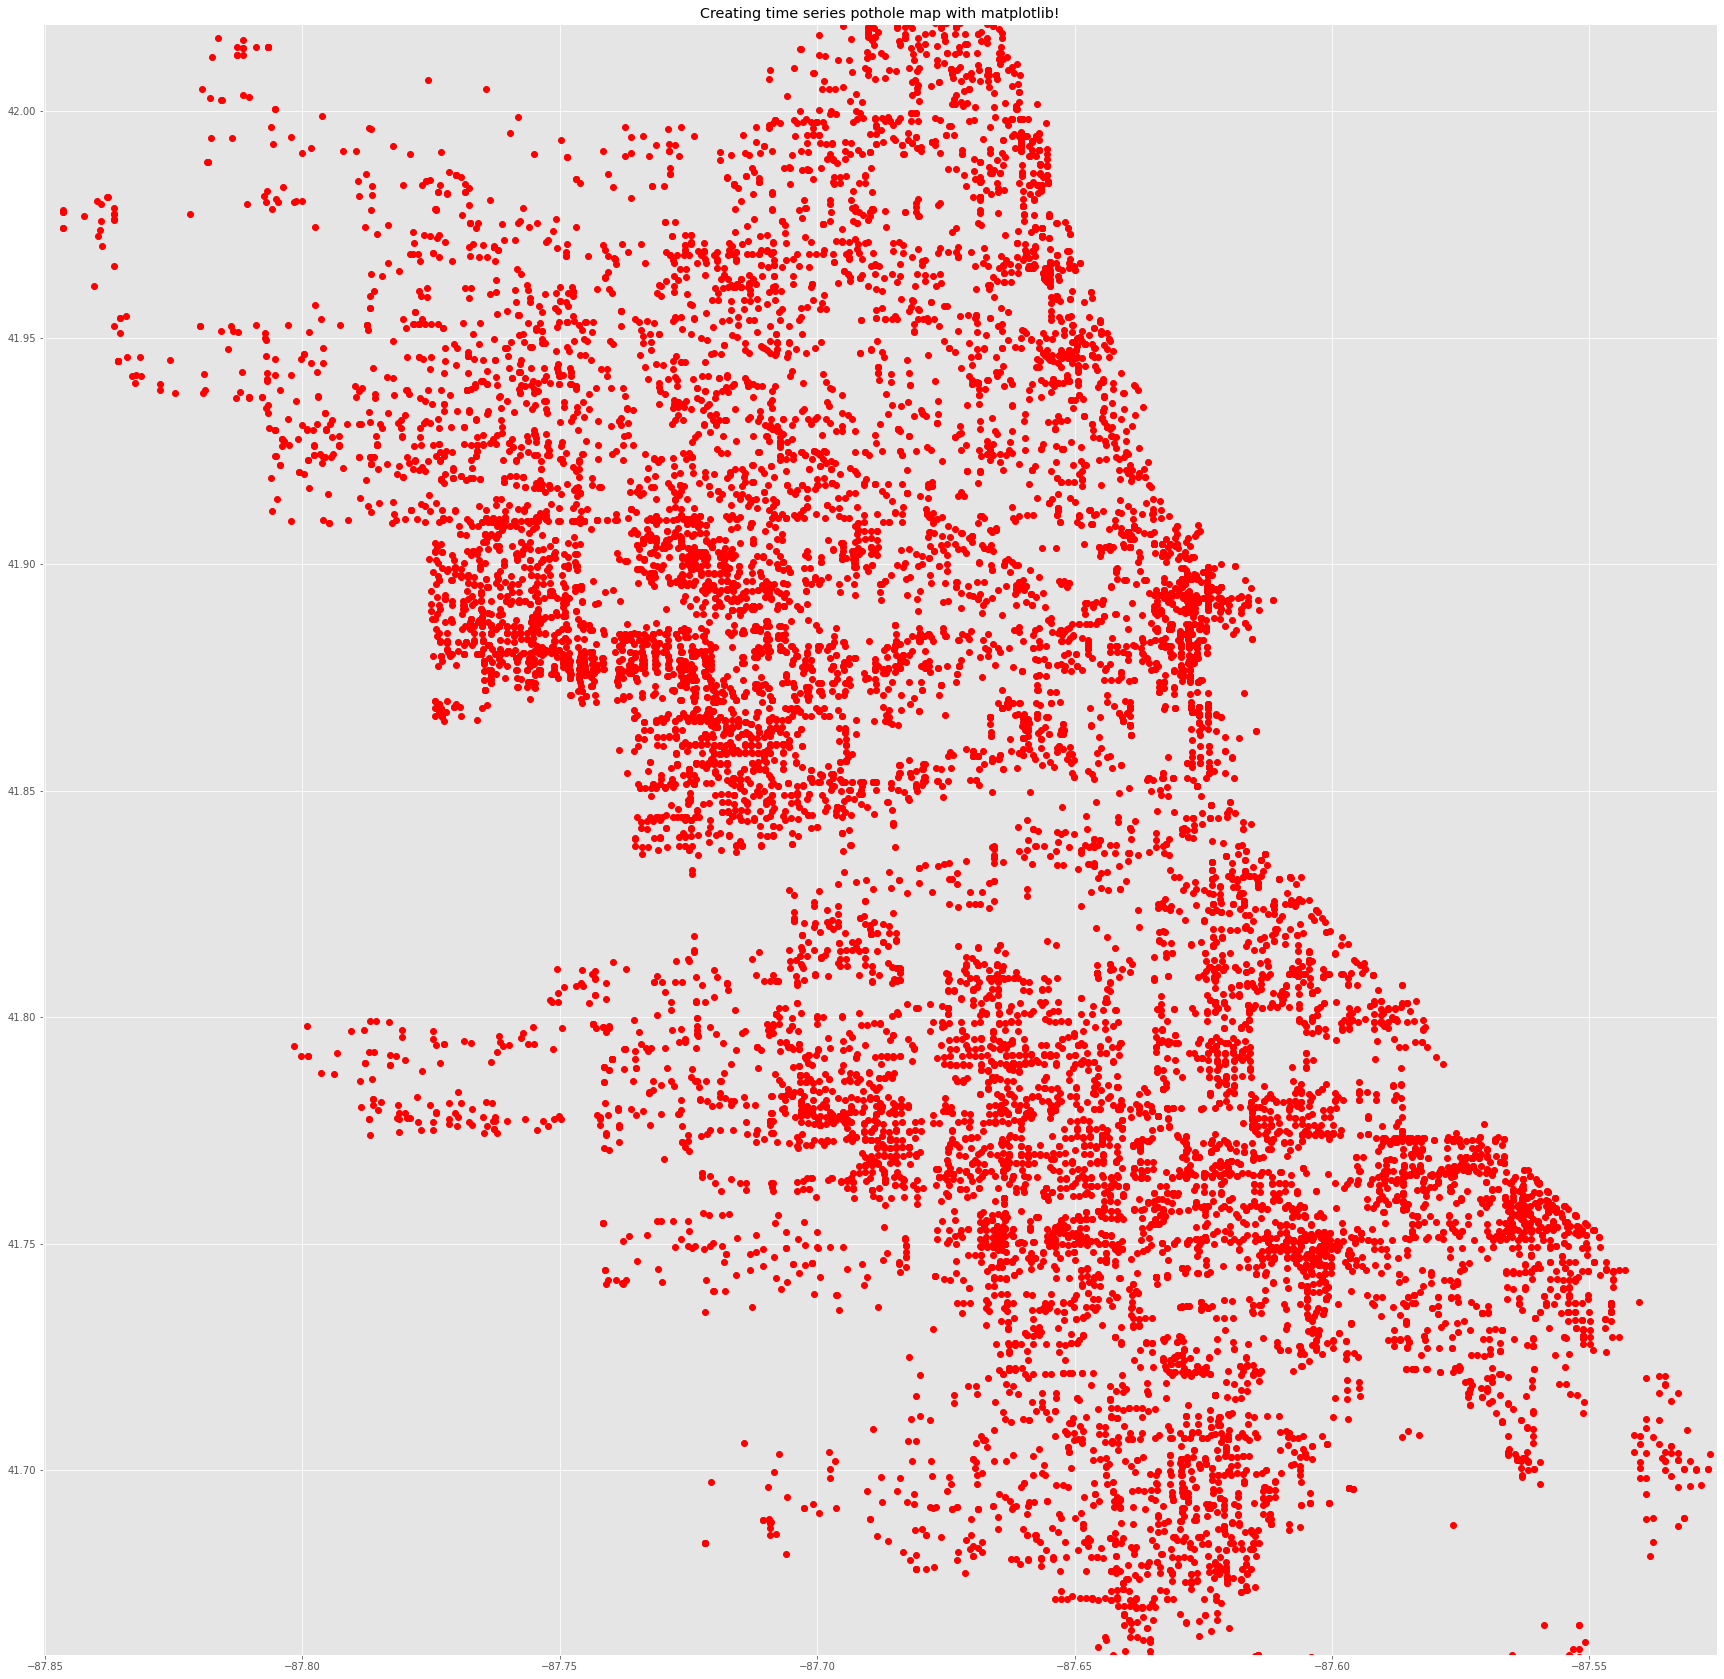

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='red', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["longitude"].dropna().to_numpy()
    ydata = df["latitude"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(map_arr),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_locations_2020.gif', writer='imagemagick') 

In [49]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [50]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [51]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [53]:
for i, df in enumerate(map_arr):
    if df["longitude"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["longitude"].dropna().to_numpy(), df["latitude"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

@0
@1
@2
@3
@4
@5
@6
@7
@8
@9
@10
@11
@12
@13
@14
@15
@16
@17
@18
@19
@20
@21
@22
@23
@24
@25
@26
@27
@28
@29
@30
@31
@32
@33
@34
@35
@36
@37
@38
@39


In [55]:
density_matrix_t_series[0].shape

(1000, 1000)

In [56]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()
dm_series_np = np.array(density_matrix_t_series)
flattened_matrix_np = np.reshape(dm_series_np, (dm_series_np.shape[0]*dm_series_np.shape[1], dm_series_np.shape[1]))

normalized_matrices = scaler.fit_transform(flattened_matrix_np)
normalized_matrices = scaler2.fit_transform(normalized_matrices)

inverseTcheck = scaler2.inverse_transform(normalized_matrices)
inverseTcheck = scaler.inverse_transform(inverseTcheck)

In [57]:
#This shape is for LSTM model input
normalized_matrices.shape

(40000, 1000)

In [58]:
data2 = normalized_matrices.reshape((int(normalized_matrices.shape[0]/normalized_matrices.shape[1]), normalized_matrices.shape[1], normalized_matrices.shape[1]))
data2.shape

(40, 1000, 1000)

In [61]:
iterable = [np.rot90(matrix) for matrix in data2]

(-87.914585337, -87.52651896299999)
(41.647454304, 42.022547189)


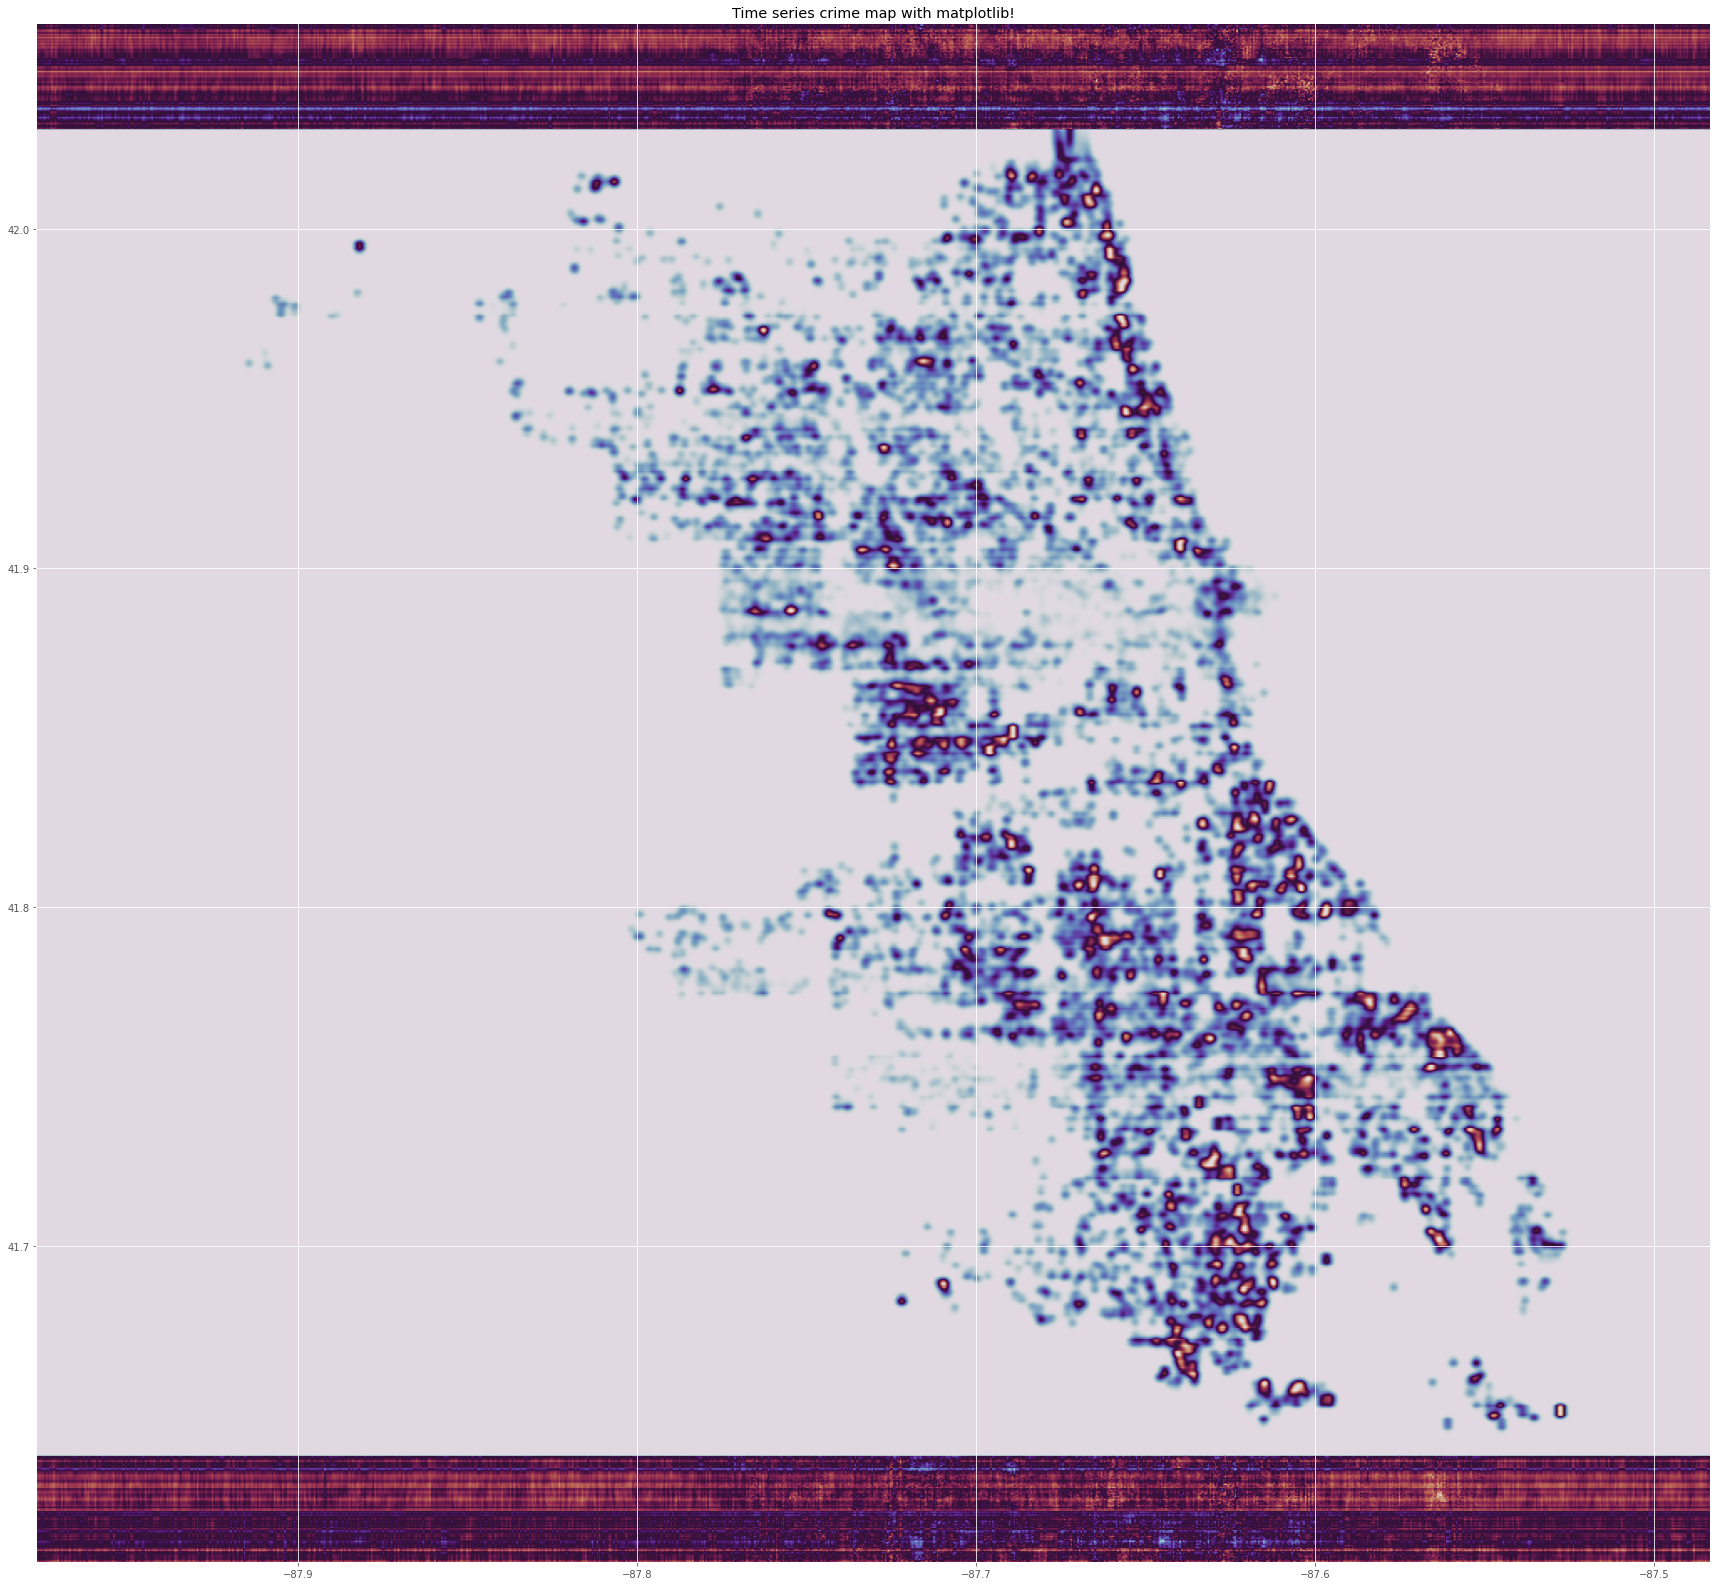

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))

print(xlim)
print(ylim)

plt.rcParams["figure.figsize"] = [30, 30]
fig1, ax1 = plt.subplots()
#ax1.scatter(x="LONGITUDE", y="LATITUDE", data=map_arr[frame_from_latest], c="red", alpha=0.4)
im = plt.imshow( X=iterable[0], cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])


# initialization function 
def init(): 
    # creating an empty plot/frame
    # print("in init")
    im.set_data(iterable[0])
    return [im]


# animation function 
def animate(i):
    #df = map_arr[i]
    #xdata = df["LONGITUDE"].dropna().to_numpy()
    #ydata = df["LATITUDE"].dropna().to_numpy()
    #np.rot90(data2[i])
    #print("in animate")
    im.set_data(iterable[i])
    return [im]

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig1, animate, init_func=init,frames=np.arange(0,np.rot90(data2).shape[1],1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_zone.gif', writer='imagemagick') 
#plt.show()